bank client data:
* 1 - age (numeric)

* 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

* 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

* 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone")
* 9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

* 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

* 14 - previous: number of contacts performed before this campaign and for this client (numeric)

* 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)

* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

* 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

* 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [19]:
bank_df = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Shows every column
pd.set_option('display.max_columns', None)

bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [20]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
print(f'Columns: {bank_df.shape[1]}\nRegisters: {bank_df.shape[0]}')

Columns: 21
Registers: 41188


In [22]:
numerical_features = list(bank_df._get_numeric_data().columns)

print(f'Numerical features:\n', *numerical_features, sep='\n- ',
    end=f'\n\nNumber of numerical features: {len(numerical_features)}')

Numerical features:

- age
- duration
- campaign
- pdays
- previous
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed

Number of numerical features: 10

In [23]:
categorical_features = [col for col in bank_df.columns if col not in numerical_features]
print(f'Categorical features:\n', *categorical_features, sep='\n- ',
    end=f'\n\nNumber of categorical features: {len(categorical_features)}')

Categorical features:

- job
- marital
- education
- default
- housing
- loan
- contact
- month
- day_of_week
- poutcome
- y

Number of categorical features: 11

In [24]:
# Number of unique values each categorical feature has
bank_df[categorical_features].nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

In [25]:
bank_df['id'] = bank_df.index + 1
bank_df.set_index('id').head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
# Encoding categorical features
encoded_df = pd.DataFrame()
encoded_df[categorical_features] = bank_df[categorical_features].apply(LabelEncoder().fit_transform)
encoded_df[numerical_features] = bank_df[numerical_features]
encoded_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,0,1,6,1,1,0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,7,1,3,1,0,0,1,6,1,1,0,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,7,1,3,0,2,0,1,6,1,1,0,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1,1,0,0,0,1,6,1,1,0,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,7,1,3,0,0,2,1,6,1,1,0,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,1,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,1,1,5,0,0,0,0,7,0,1,0,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,5,1,6,0,2,0,0,7,0,1,0,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,9,1,5,0,0,0,0,7,0,1,1,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [27]:
# Features
X = encoded_df.drop(columns=['y'], axis='columns')
bank_features = X.columns

# Target
y = encoded_df['y']

In [28]:
# Centering data around their mean before applying the PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=encoded_df.drop(columns=['y'], axis='columns').columns)
X

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.192622,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.192622,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.192622,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.192622,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.192622,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.192622,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


<AxesSubplot: >

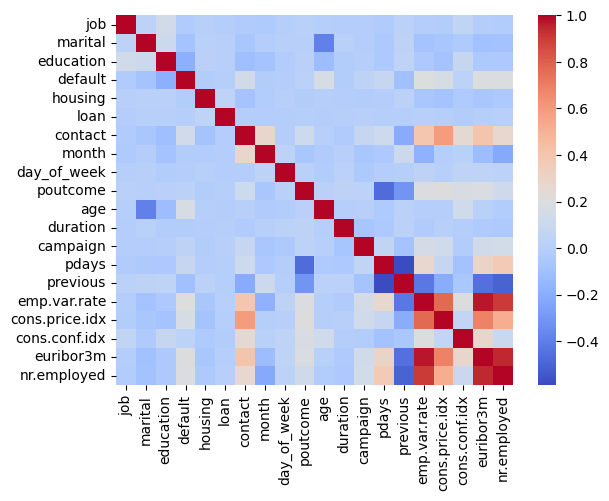

In [29]:
sns.heatmap(pd.DataFrame(X).corr(), cmap='coolwarm')

In [30]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.21347535, 0.08423607, 0.07706311, 0.06790633, 0.05696684,
       0.05453473, 0.05174433, 0.0503256 , 0.04935043, 0.04769317,
       0.04630322, 0.04552034, 0.04302436, 0.03719791, 0.02924534,
       0.02769374, 0.01281992, 0.00352633, 0.00102274, 0.00035013])

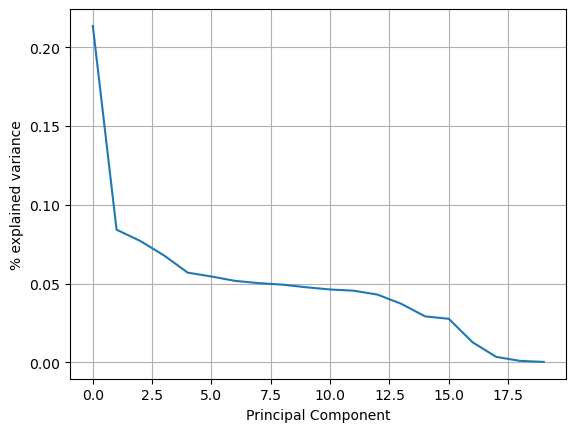

In [31]:
plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');